<a href="https://colab.research.google.com/github/Shoebtamboli/COVID-19-Analysis/blob/master/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this notebook we will do covid-19 visualization


1.   Web scraping with lxml.html and BeautifulSoup
2.   Storing data with pandas
3.   Visualization

In [0]:
from bs4 import BeautifulSoup
import urllib.request
import lxml.html as lh
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>Coronavirus Update (Live): 6,317,980 Cases and 375,037 Deaths from COVID-19 Virus Pandemic - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link r
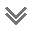

In [251]:
page = requests.get('https://www.worldometers.info/coronavirus/#countries')
page.content

In [253]:
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')

print(tr_elements)

#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

[<Element tr at 0x7f939775e4a8>, <Element tr at 0x7f9395fe3098>, <Element tr at 0x7f9395fe3278>, <Element tr at 0x7f9395fe33b8>, <Element tr at 0x7f9395fe3408>, <Element tr at 0x7f9395fe3458>, <Element tr at 0x7f9395fe34a8>, <Element tr at 0x7f9395fe34f8>, <Element tr at 0x7f9395fe3548>, <Element tr at 0x7f9395fe3598>, <Element tr at 0x7f9395fe35e8>, <Element tr at 0x7f9395fe3638>, <Element tr at 0x7f9395fe3688>, <Element tr at 0x7f9395fe36d8>, <Element tr at 0x7f9395fe3728>, <Element tr at 0x7f9395fe3778>, <Element tr at 0x7f9395fe37c8>, <Element tr at 0x7f9395fe3818>, <Element tr at 0x7f9395fe3868>, <Element tr at 0x7f9395fe38b8>, <Element tr at 0x7f9395fe3908>, <Element tr at 0x7f9395fe3958>, <Element tr at 0x7f9395fe39a8>, <Element tr at 0x7f9395fe39f8>, <Element tr at 0x7f9395fe3a48>, <Element tr at 0x7f9395fe3a98>, <Element tr at 0x7f9395fe3ae8>, <Element tr at 0x7f9395fe3b38>, <Element tr at 0x7f9395fe3b88>, <Element tr at 0x7f9395fe3bd8>, <Element tr at 0x7f9395fe3c28>, <Elemen

In [0]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=15:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1


In [255]:
[len(C) for (title,C) in col]

[463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463, 463]

In [0]:
Dict={title:column for (title,column) in col}

df = pd.DataFrame(Dict)

In [257]:
df.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
0,,\nNorth America\n,"2,078,140","+11,712","125,113",385,"741,874","1,211,153","19,373",,,,,,North America
1,,\nSouth America\n,"883,948","+6,004","40,172",91,"355,089","488,687","11,399",,,,,,South America
2,,\nEurope\n,"2,031,992","+12,211","174,061",337,"993,867","864,064","8,790",,,,,,Europe
3,,\nAsia\n,"1,162,365","+25,568","31,258",481,"712,045","419,062","13,657",,,,,,Asia
4,,\nAfrica\n,"152,000","+3,225","4,293",48,"64,995","82,712",344,,,,,,Africa
5,,\nOceania\n,"8,814",10,125,,"8,201",488,3,,,,,,Australia/Oceania
6,,\n\n,721,,15,,651,55,4,,,,,,
7,,World,"6,317,980","+58,730","375,037","+1,342","2,876,722","3,066,221","53,570",811,48.1,,,,All
8,1,USA,"1,843,920","+6,750","106,379",184,"601,375","1,136,166","17,075","5,573",322,"17,774,001","53,723","330,843,477",North America
9,2,Brazil,"514,992",143,"29,341",27,"206,555","279,096","8,318","2,424",138,"930,013","4,378","212,434,518",South America


In [258]:
df.tail(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
453,214,Lesotho,2,,,,1,1,,0.9,,283,132,"2,140,838",Africa
454,215,Saint Pierre Miquelon,1,,,,1,0,,173,,,,"5,796",North America
455,,Total:,"1,136,797","+29,277","30,777",570,"694,863","411,157","13,593",,,,,,Asia
456,,Total:,"2,066,428","+25,595","124,728","+1,256","737,140","1,204,560","19,375",,,,,,North America
457,,Total:,"877,944","+33,325","40,081",766,"352,606","485,257","11,321",,,,,,South America
458,,Total:,"2,019,781","+15,555","173,724",444,"987,067","858,990","8,766",,,,,,Europe
459,,Total:,"148,775","+5,006","4,245",153,"63,463","81,067",346,,,,,,Africa
460,,Total:,"8,804",10,125,,"8,196",483,4,,,,,,Australia/Oceania
461,,Total:,721,,15,,651,55,4,,,,,,
462,,Total:,"6,259,250","+108,768","373,695","+3,189","2,843,986","3,041,569","53,409",803.0,47.9,,,,All


In [259]:
# Remove the duplicated column

country_df = df[8:455]
country_df = country_df.set_index(['#'])
country_df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
#,,,,,,,,,,,,,,
1,USA,"1,843,920","+6,750","106,379",184,"601,375","1,136,166","17,075","5,573",322,"17,774,001","53,723","330,843,477",North America
2,Brazil,"514,992",143,"29,341",27,"206,555","279,096","8,318","2,424",138,"930,013","4,378","212,434,518",South America
3,Russia,"414,878","+9,035","4,855",162,"175,877","234,146","2,300","2,843",33,"10,923,108","74,852","145,929,507",Europe
4,Spain,"286,509",,"27,127",,"196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345",Europe
5,UK,"274,762",,"38,489",,N/A,N/A,"1,559","4,049",567,"4,285,738","63,158","67,856,881",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,1,,,7,0,,267,,424,"16,181","26,203",North America
212,St. Barth,6,,,,6,0,,608,,137,"13,873","9,875",North America
213,Anguilla,3,,,,3,0,,200,,41,"2,735","14,992",North America


In [260]:
# rename column name
country_df = country_df.rename(columns={"Country,Other":"Country", "Serious,Critical": "SeriousCases"})
country_df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent
#,,,,,,,,,,,,,,
1,USA,"1,843,920","+6,750","106,379",184,"601,375","1,136,166","17,075","5,573",322,"17,774,001","53,723","330,843,477",North America
2,Brazil,"514,992",143,"29,341",27,"206,555","279,096","8,318","2,424",138,"930,013","4,378","212,434,518",South America
3,Russia,"414,878","+9,035","4,855",162,"175,877","234,146","2,300","2,843",33,"10,923,108","74,852","145,929,507",Europe
4,Spain,"286,509",,"27,127",,"196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345",Europe
5,UK,"274,762",,"38,489",,N/A,N/A,"1,559","4,049",567,"4,285,738","63,158","67,856,881",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,1,,,7,0,,267,,424,"16,181","26,203",North America
212,St. Barth,6,,,,6,0,,608,,137,"13,873","9,875",North America
213,Anguilla,3,,,,3,0,,200,,41,"2,735","14,992",North America


In [0]:
# drop the columns
country_df = country_df.drop(columns= ['Deaths/1M pop'])
country_df = country_df.drop(columns= ['Continent'])
country_df = country_df.drop(columns= ['Tests/\n1M pop\n'])
#country_df = country_df.drop(columns= ['Tot\xa0Cases/1M pop'])

In [0]:
country_df['Tot\xa0Cases/1M pop']
country_df = country_df.rename(columns={'Tot\xa0Cases/1M pop':"Country11"})
country_df = country_df.drop(columns= ['Country11'])

In [325]:
country_df.head(10)

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,TotalTests,Population
#,,,,,,,,,,
1,USA,"1,843,920","+6,750","106,379",184,"601,375","1,136,166","17,075","17,774,001","330,843,477"
2,Brazil,"514,992",143,"29,341",27,"206,555","279,096","8,318","930,013","212,434,518"
3,Russia,"414,878","+9,035","4,855",162,"175,877","234,146","2,300","10,923,108","145,929,507"
4,Spain,"286,509",,"27,127",,"196,958","62,424",617,"4,063,843","46,753,345"
5,UK,"274,762",,"38,489",,N/A,N/A,"1,559","4,285,738","67,856,881"
6,Italy,"233,197",200,"33,475",60,"158,355","41,367",424,"3,910,133","60,468,778"
7,India,"197,854","+7,245","5,603",195,"95,422","96,829","8,944","3,837,207","1,378,863,296"
8,France,"188,882",,"28,802",,"68,355","91,725","1,319","1,384,633","65,261,942"
9,Germany,"183,627",133,"8,610",5,"165,900","9,117",702,"3,952,971","83,762,346"


In [0]:
select_country = country_df.loc[country_df['Country'] == 'India']

In [347]:
# Even index today's cases 
todays_cases = select_country.iloc[0]
# Odd index yesterday's cases
yesterdays_cases = select_country.iloc[1]

print(yesterdays_cases)
print(yesterdays_cases.ActiveCases)

Country                    India
TotalCases               190,609
NewCases                  +8,782
TotalDeaths               5,408 
NewDeaths                    223
TotalRecovered            91,852
ActiveCases               93,349
SeriousCases               8,944
TotalTests             3,737,027
Population        1,378,863,296 
Name: 8, dtype: object
93,349


In [311]:
todays_cases

Country                    India
TotalCases               197,854
NewCases                  +7,245
TotalDeaths               5,603 
NewDeaths                    195
TotalRecovered            95,422
ActiveCases               96,829
SeriousCases               8,944
TotalTests             3,837,207
Population        1,378,863,296 
Name: 7, dtype: object

In [365]:
select_country.ActiveCases.iloc[:2]

#
7    96,829
8    93,349
Name: ActiveCases, dtype: object

In [384]:
select_country

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,TotalTests,Population
#,,,,,,,,,,
7,India,"197,854","+7,245","5,603",195,"95,422","96,829","8,944","3,837,207","1,378,863,296"
8,India,"190,609","+8,782","5,408",223,"91,852","93,349","8,944","3,737,027","1,378,863,296"


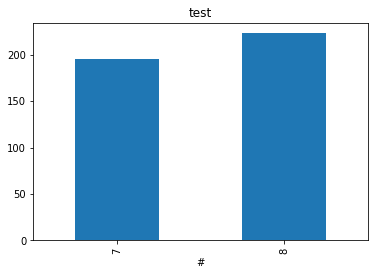

In [383]:
select_country['NewDeaths'].plot(kind="bar", title="test")

In [0]:
select_country['NewDeaths'].plot(kind="bar", title="test")